# 🧍 Attrition Analysis

This notebook explores attrition drivers and workforce risk patterns based on HR data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
hr_df = pd.read_csv('../data/HR_Attrition.csv')
hr_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


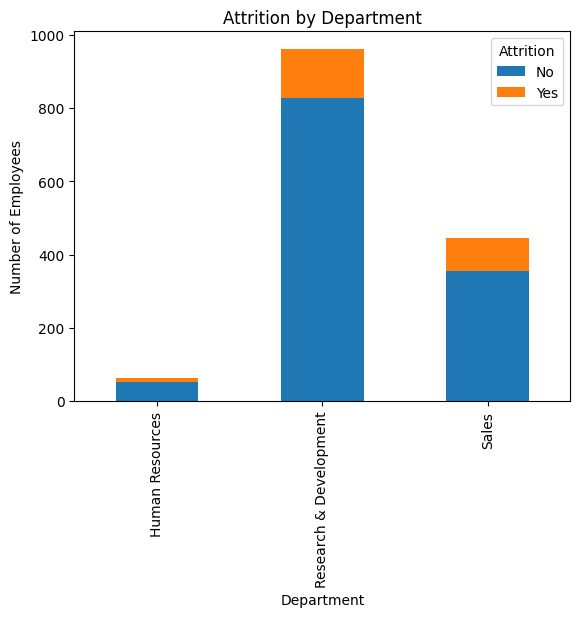

In [2]:
attrition_counts = hr_df.groupby(['Department', 'Attrition']).size().unstack()
attrition_counts.plot(kind='bar', stacked=True)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()


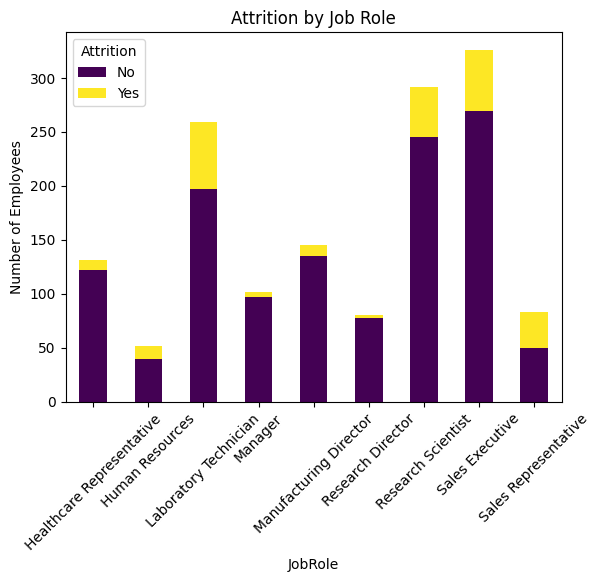

In [3]:
job_attrition = hr_df.groupby(['JobRole', 'Attrition']).size().unstack()
job_attrition.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.ylabel('Number of Employees')
plt.show()


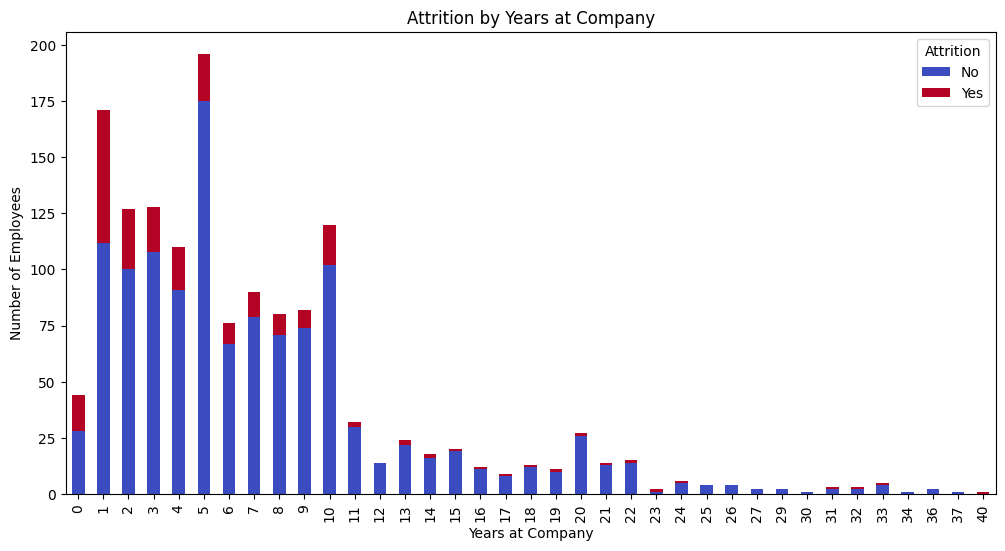

In [4]:
years_attrition = hr_df.groupby(['YearsAtCompany', 'Attrition']).size().unstack()
years_attrition.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('Attrition by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.show()


C:\Users\ivana\AppData\Local\Temp\ipykernel_3672\1143988479.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = hr_df.groupby(['AgeGroup', 'Attrition']).size().unstack()


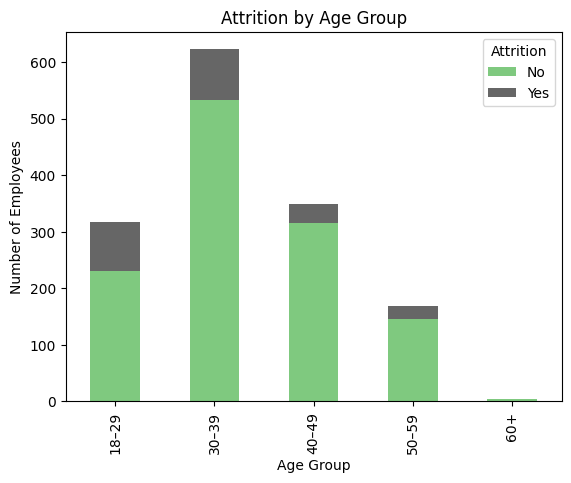

In [5]:
# Create Age Groups
hr_df['AgeGroup'] = pd.cut(hr_df['Age'], bins=[18, 29, 39, 49, 59, 69], 
                           labels=['18–29', '30–39', '40–49', '50–59', '60+'])

age_attrition = hr_df.groupby(['AgeGroup', 'Attrition']).size().unstack()
age_attrition.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()


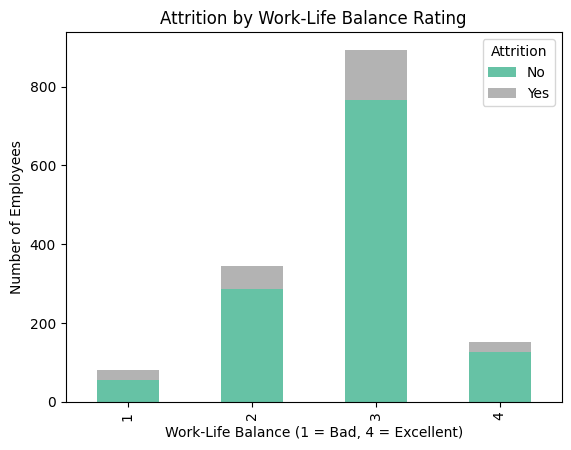

In [6]:
balance_attrition = hr_df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()
balance_attrition.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Attrition by Work-Life Balance Rating')
plt.xlabel('Work-Life Balance (1 = Bad, 4 = Excellent)')
plt.ylabel('Number of Employees')
plt.show()


In [7]:
attrition_rate = hr_df['Attrition'].value_counts(normalize=True) * 100
print("Overall Attrition Rate:\n", attrition_rate)


Overall Attrition Rate:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


## 🔍 Key Questions
- Which roles or departments show the highest attrition?
- Are there early warning signs (e.g., years at company, work-life balance)?
- Where could automation reduce pressure and risk of departure?